In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
df = pd.read_csv('preprocessed_SeriesOn.csv')
print(df.dtypes)
print(df.shape[0])

title            object
year              int64
version          object
type             object
director         object
actor            object
age              object
runtime           int64
rating          float64
like              int64
comment           int64
isDRM            object
cost              int64
period           object
is_action         int64
is_comedy         int64
is_drama          int64
is_melo           int64
is_horror         int64
is_fantasy        int64
is_animation      int64
is_DQ             int64
is_indie          int64
is_concert        int64
dtype: object
29185


In [12]:
# df[(df['rating']==0) & ((df['like']!=0) | (df['comment']!=0))]
# df[(df['rating']==0) & (df['like']!=0)]

df.drop(['rating','like','comment'],axis=1)
target= df['rating']

In [3]:
for col in df.columns:
    print(f"Column {col}:")

    print(df[col].value_counts())
    print("\n")

Column title:
플란다스의 개     7
실종          7
비스트         7
챔피언         6
작은 아씨들      6
           ..
블러디 마리아     1
블러디 머더 2    1
블러디 빌리지     1
블러디홈커밍      1
힛쳐          1
Name: title, Length: 19830, dtype: int64


Column year:
0       11499
2023     1246
2021     1162
2017     1032
2014     1002
        ...  
1965        3
1967        3
1969        2
1953        2
1964        2
Name: year, Length: 77, dtype: int64


Column version:
Null    26400
자막       1507
더빙       1278
Name: version, dtype: int64


Column type:
구매    19343
대여     9812
무료       30
Name: type, dtype: int64


Column director:
홍상수                65
스티븐 스필버그           58
클린트 이스트우드          45
Null               42
왕정                 40
                   ..
마리완 타나폰             1
마리완 타나폰,압들린 샤우키     1
조니 뎁                1
남무성                 1
데이브 마이어스            1
Name: director, Length: 11185, dtype: int64


Column actor:
Null                                                         1682
사묘                                

In [4]:
df.groupby(['age']).size()

age
12세 관람가     6210
15세 관람가    11974
19세 관람가     6647
7세 관람가        28
전체 관람가      4326
dtype: int64

In [5]:
df

,title,year,version,type,director,actor,age,runtime,rating,like,...,is_action,is_comedy,is_drama,is_melo,is_horror,is_fantasy,is_animation,is_DQ,is_indie,is_concert
0,'개그' 더 크라운,2021,Null,구매,아담 크라우스,"로렌 애슐리 카터,트레이시 페레즈",15세 관람가,89,6.33,0,...,0,1,0,0,1,0,0,0,0,0
1,'데이빗 린치' 단편선,0,Null,구매,데이빗 린치,Null,19세 관람가,148,10.00,21,...,0,0,1,0,0,0,0,0,0,0
2,...ing,2003,Null,구매,이언희,"임수정,김래원,이미숙,최덕문,이성경,김지영,윤덕현,이유정",12세 관람가,103,8.89,9,...,0,0,0,1,0,0,0,0,0,0
3,...ing,2003,Null,대여,이언희,"임수정,김래원,이미숙,최덕문,이성경,김지영,윤덕현,이유정",12세 관람가,103,8.89,4,...,0,0,0,1,0,0,0,0,0,0
4,0,0,Null,구매,이보리,"박현수,이보리,전혜원,이민지,공예림",15세 관람가,18,10.00,1,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29180,힙노시스: LP 커버의 전설,2024,Null,구매,안톤 코르빈,"오브리 포웰,스톰 소거슨,폴 맥카트니,데이빗 길모어,로저 워터스,닉 메이슨,지미 페...",15세 관람가,101,8.26,0,...,0,0,0,0,0,0,0,1,0,0
29181,힙노시스: LP 커버의 전설,2024,Null,대여,안톤 코르빈,"오브리 포웰,스톰 소거슨,폴 맥카트니,데이빗 길모어,로저 워터스,닉 메이슨,지미 페...",15세 관람가,101,8.26,2,...,0,0,0,0,0,0,0,1,0,0
29182,힙노틱,2023,Null,구매,로버트 로드리게즈,"벤 애플렉,앨리스 브라가,윌리암 피츠너",15세 관람가,93,6.66,3,...,1,0,0,0,0,1,0,0,0,0
29183,힙노틱,2023,Null,대여,로버트 로드리게즈,"벤 애플렉,앨리스 브라가,윌리암 피츠너",15세 관람가,93,6.66,3,...,1,0,0,0,0,1,0,0,0,0


In [6]:
df.describe()

,year,runtime,rating,like,comment,cost,is_action,is_comedy,is_drama,is_melo,is_horror,is_fantasy,is_animation,is_DQ,is_indie,is_concert
count,29185.00000,29185.000000,29185.000000,29185.000000,29185.000000,29185.000000,29185.000000,29185.000000,29185.000000,29185.000000,29185.000000,29185.000000,29185.000000,29185.000000,29185.000000,29185.000000
mean,1219.24934,97.535652,5.750743,24.044886,2.312900,3006.784992,0.351174,0.183725,0.430529,0.124482,0.187185,0.111975,0.097139,0.038890,0.001747,0.002022
std,983.17875,25.860585,3.298004,87.267304,11.191552,2411.415442,0.477345,0.387266,0.495159,0.330136,0.390067,0.315342,0.296152,0.193336,0.041767,0.044917
min,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.00000,88.000000,4.000000,1.000000,0.000000,1300.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2003.00000,98.000000,7.060000,3.000000,0.000000,1540.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2017.00000,111.000000,8.230000,15.000000,1.000000,5000.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,2024.00000,318.000000,10.000000,5666.000000,546.000000,50000.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [7]:
from matplotlib import font_manager, rc
font_manager.findSystemFonts()

['C:\\Windows\\Fonts\\ARIALNBI.TTF',
 'C:\\Windows\\Fonts\\CascadiaCode.ttf',
 'C:\\Windows\\Fonts\\HMKMAMI.TTF',
 'C:\\Windows\\Fonts\\segoeuii.ttf',
 'C:\\Windows\\Fonts\\segoeuil.ttf',
 'C:\\Windows\\Fonts\\HANDotumExt.ttf',
 'C:\\Windows\\Fonts\\malgunbd.ttf',
 'C:\\Users\\win\\AppData\\Local\\Microsoft\\Windows\\Fonts\\malgun.ttf',
 'C:\\Windows\\Fonts\\simsunb.ttf',
 'C:\\Windows\\Fonts\\gadugib.ttf',
 'C:\\Windows\\Fonts\\HMKMMAG.TTF',
 'C:\\Windows\\Fonts\\seguisb.ttf',
 'C:\\Windows\\Fonts\\SitkaI.ttc',
 'C:\\Windows\\Fonts\\BOOKOS.TTF',
 'C:\\Windows\\Fonts\\trebuc.ttf',
 'C:\\Windows\\Fonts\\GARABD.TTF',
 'C:\\Windows\\Fonts\\calibrib.ttf',
 'C:\\Windows\\Fonts\\OUTLOOK.TTF',
 'C:\\Windows\\Fonts\\phagspab.ttf',
 'C:\\Windows\\Fonts\\sylfaen.ttf',
 'C:\\Windows\\Fonts\\SitkaB.ttc',
 'C:\\Windows\\Fonts\\Nirmala.ttf',
 'C:\\Windows\\Fonts\\couri.ttf',
 'C:\\Windows\\Fonts\\constan.ttf',
 'C:\\Windows\\Fonts\\LeelUIsl.ttf',
 'C:\\Windows\\Fonts\\REFSPCL.TTF',
 'C:\\Windows\\Fo

In [8]:
font_location = 'C:\\Windows\\Fonts\\MALGUNSL.TTF' # For Windows
font_name = font_manager.FontProperties(fname=font_location).get_name()
plt.rc('font', family=font_name)
# rc('font', family=font_name)

C:\Users\Koo\AppData\Local\Temp\ipykernel_6576\3941083229.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()
C:\Users\Koo\AppData\Local\anaconda3\lib\site-packages\seaborn\utils.py:80: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.draw()
C:\Users\Koo\AppData\Local\anaconda3\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


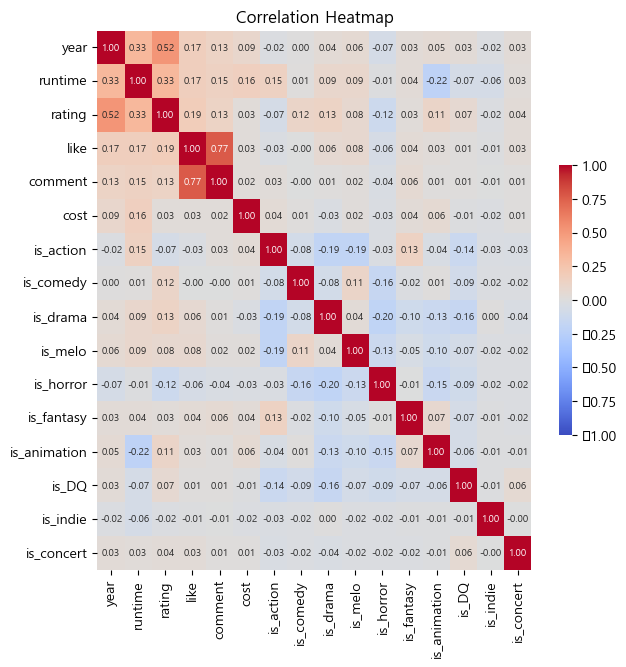

In [9]:
# 변수들 간 공분산(상관계수)
plt.figure(figsize=(7, 7))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', vmin=-1, vmax=1, annot_kws={'size': 7}, cbar_kws={'shrink': 0.5})
plt.title('Correlation Heatmap')
plt.show()




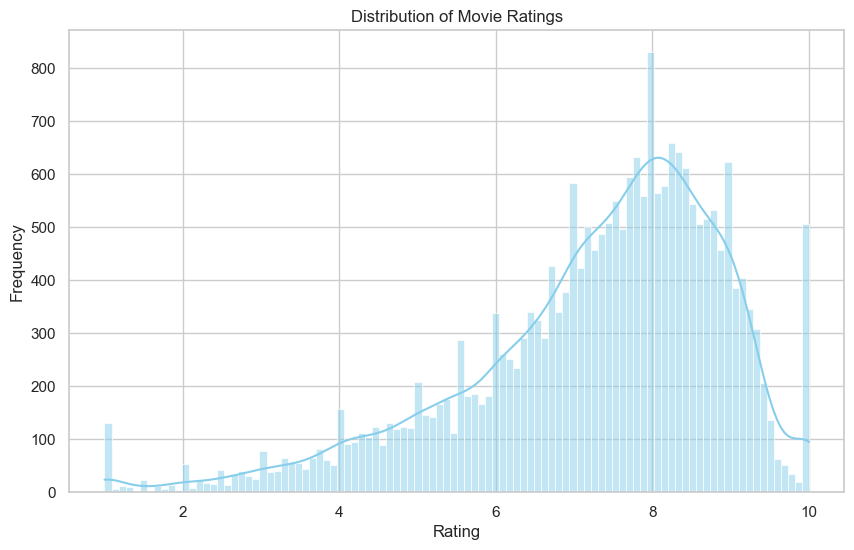

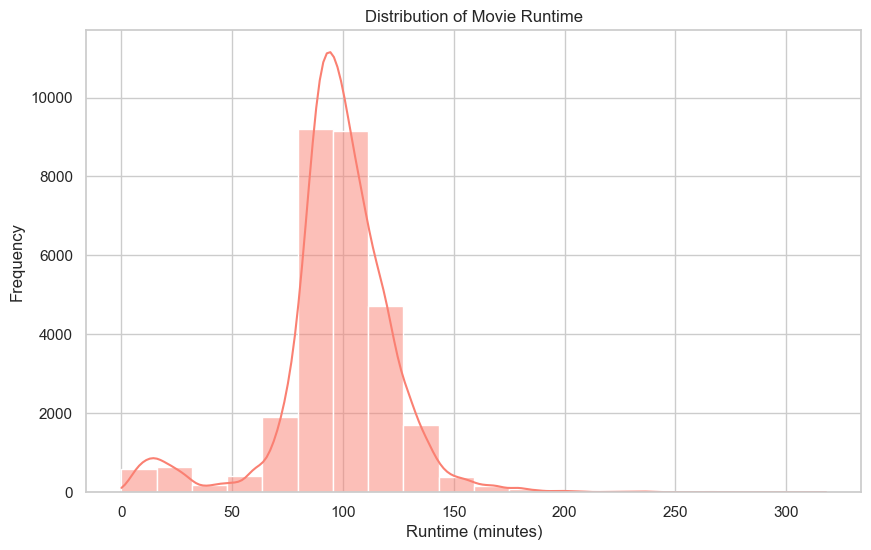

In [10]:


sns.set(style="whitegrid")


# 영화평점을 부여받은 영화들의 별점별 개수
plt.figure(figsize=(10, 6))
sns.histplot(df[df['rating']>0]['rating'], bins=100, kde=True, color='skyblue')
plt.title('Distribution of Movie Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

# 상영시간분포
plt.figure(figsize=(10, 6))
sns.histplot(df['runtime'], bins=20, kde=True, color='salmon')
plt.title('Distribution of Movie Runtime')
plt.xlabel('Runtime (minutes)')
plt.ylabel('Frequency')
plt.show()






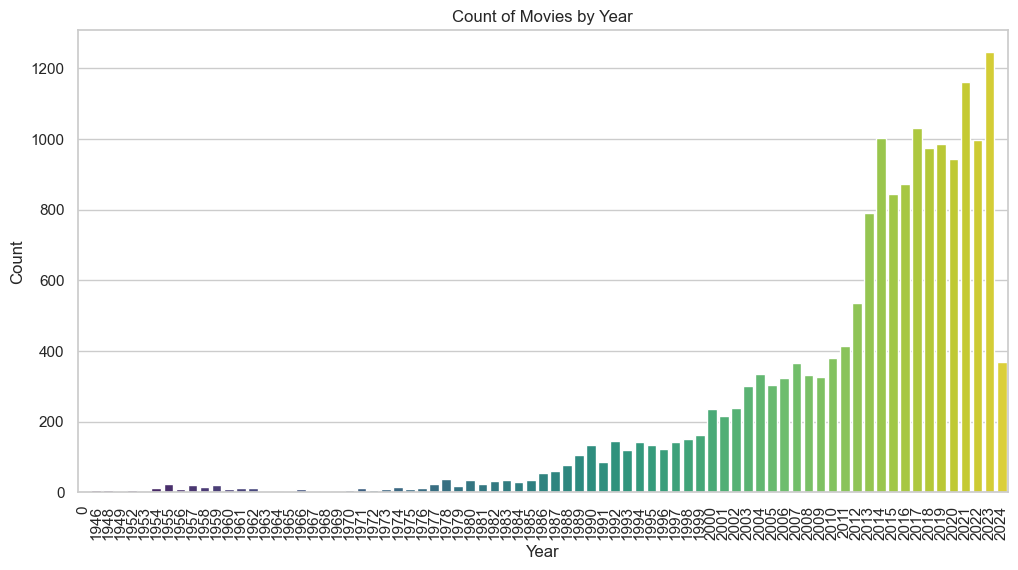

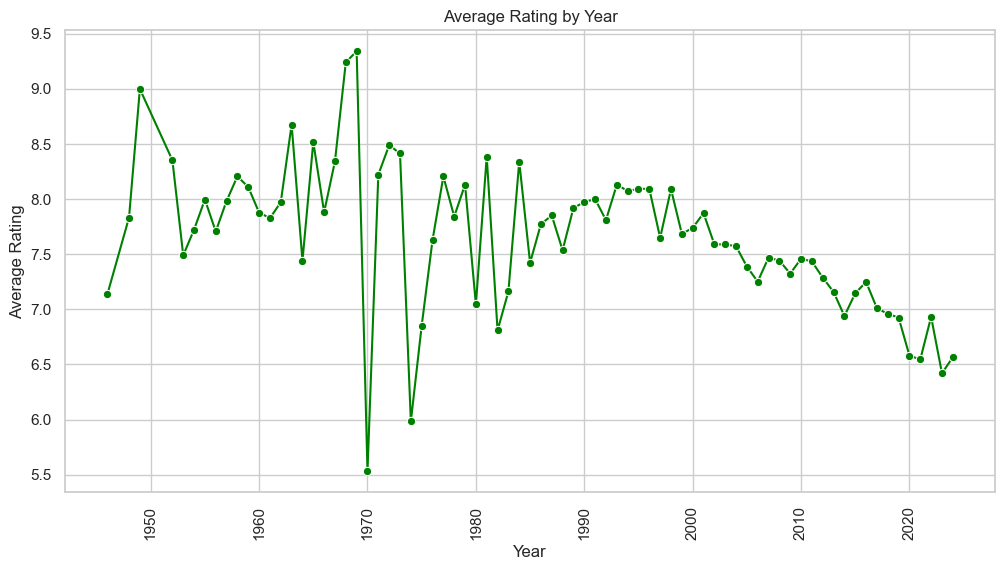

In [11]:
# 연도별 영화개수

year_sort = sorted(df['year'].unique())
plt.figure(figsize=(12, 6))
sns.countplot(x='year', data=df[df['year']>0], palette='viridis', order=year_sort)
plt.title('Count of Movies by Year')
plt.xlabel('Year')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

# 연도별 영화들의 평점 평균
plt.figure(figsize=(12, 6))
avg_rating_by_year = df[df['year']>0].groupby('year')['rating'].mean().reset_index()
sns.lineplot(x='year', y='rating', data=avg_rating_by_year, marker='o', color='green')
plt.title('Average Rating by Year')
plt.xlabel('Year')
plt.ylabel('Average Rating')
plt.xticks(rotation=90)
plt.show()



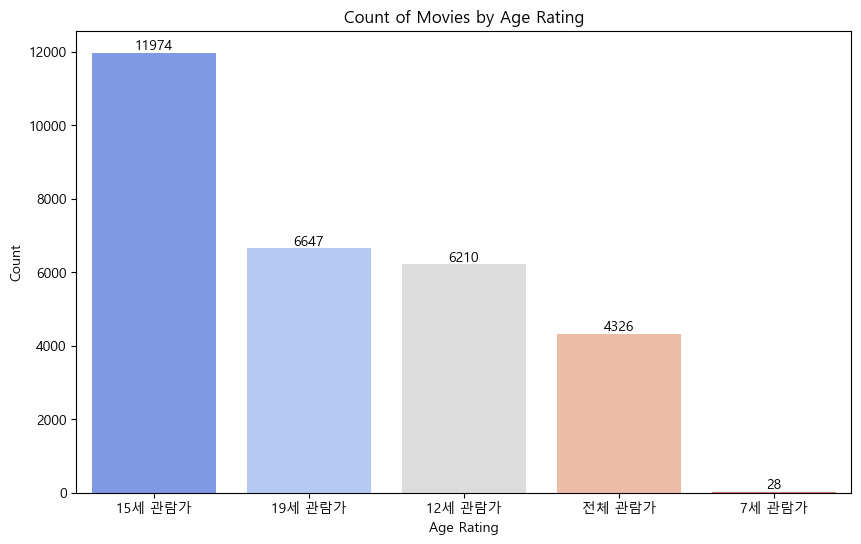

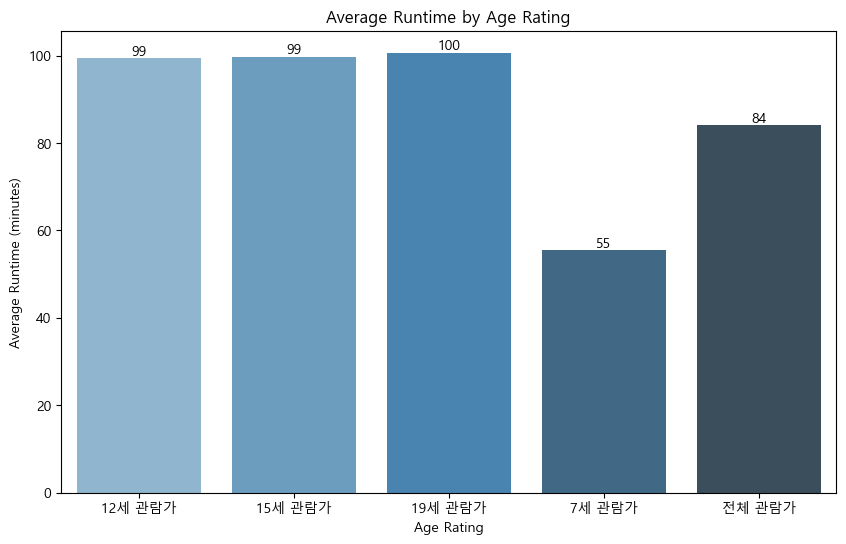

In [9]:


# 연령제한 별 영화평점
plt.figure(figsize=(10, 6))
plot1 = sns.countplot(x='age', data=df, palette='coolwarm', order=df['age'].value_counts().index)
plt.title('Count of Movies by Age Rating')
plt.xlabel('Age Rating')
plt.ylabel('Count')
for patch in plot1.patches:
    height = patch.get_height()
    if height > 0:
        plt.text(patch.get_x() + patch.get_width() / 2., height, int(height), ha='center', va='bottom')
plt.show()

# 연령제한별 상영시간
plt.figure(figsize=(10, 6))
avg_runtime_by_age = df.groupby('age')['runtime'].mean().reset_index()
plot1 = sns.barplot(x='age', y='runtime', data=avg_runtime_by_age, palette='Blues_d')
plt.title('Average Runtime by Age Rating')
plt.xlabel('Age Rating')
plt.ylabel('Average Runtime (minutes)')
for patch in plot1.patches:
    height = patch.get_height()
    if height > 0:
        plt.text(patch.get_x() + patch.get_width() / 2., height, int(height), ha='center', va='bottom')
plt.show()



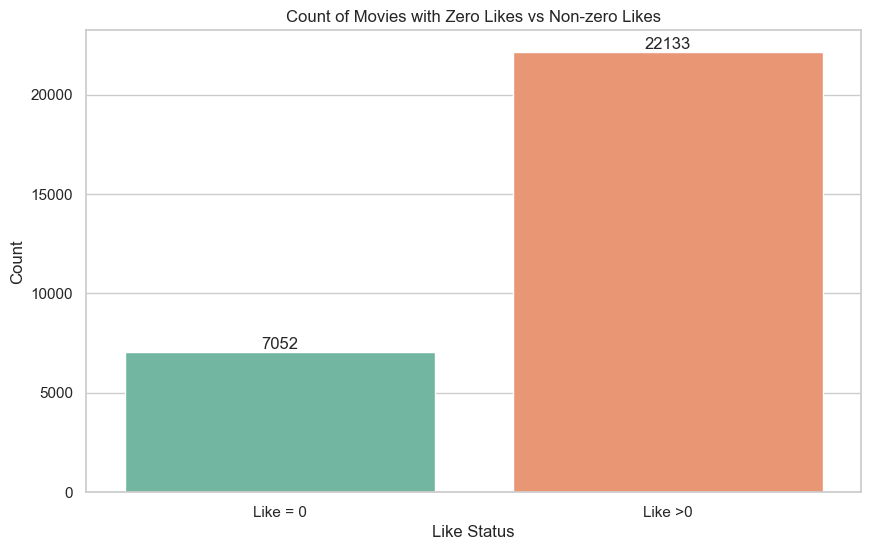

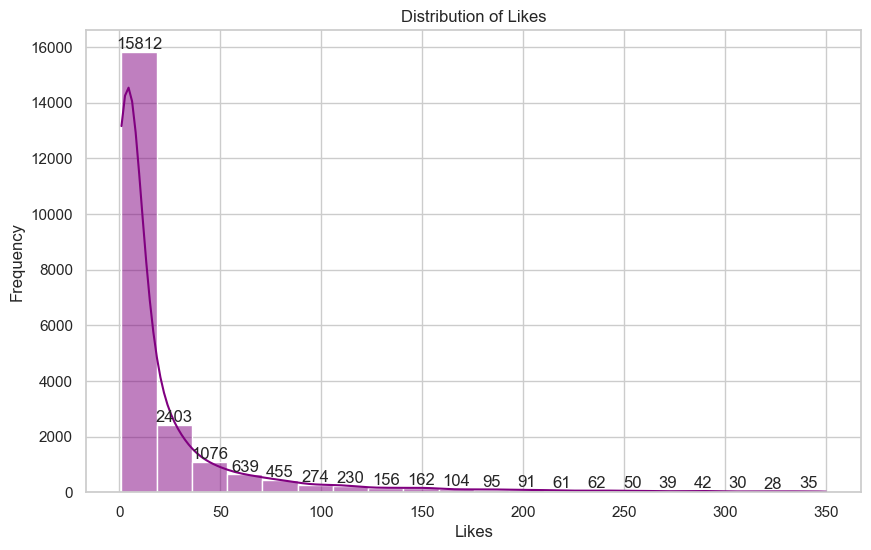

In [13]:
# 좋아요를 못받은 / 받은 영화

like_status = df['like'].apply(lambda x: 'Like = 0' if x == 0 else 'Like >0')
plt.figure(figsize=(10, 6))
plot1 = sns.countplot(x=like_status, palette='Set2')
plt.title('Count of Movies with Zero Likes vs Non-zero Likes')
plt.xlabel('Like Status')
plt.ylabel('Count')
for patch in plot1.patches:
    height = patch.get_height()
    if height > 0:
        plt.text(patch.get_x() + patch.get_width() / 2., height, int(height), ha='center', va='bottom')
plt.show()

# 영화의 좋아요 수 분포 (상위 99%에 대해서만, 좋아요 최다 영화 : 5666개)
plt.figure(figsize=(10, 6))
plot2 = sns.histplot(df[(df['like']>0) & (df['like']<= df['like'].quantile(0.99))]['like'], bins=20, kde=True, color='purple')
plt.title('Distribution of Likes')
plt.xlabel('Likes')
plt.ylabel('Frequency')

for patch in plot2.patches:
    height = patch.get_height()
    if height > 0:
        plt.text(patch.get_x() + patch.get_width() / 2., height, int(height), ha='center', va='bottom')
        
plt.show()



In [14]:
df['like'].quantile(0.99)

350.0

In [15]:

df[df['like']==df['like'].max()]

,title,year,version,type,director,actor,age,runtime,rating,like,...,is_action,is_comedy,is_drama,is_melo,is_horror,is_fantasy,is_animation,is_DQ,is_indie,is_concert
4146,너의 이름은.,2017,자막,구매,신카이 마코토,"김가령,이경태,카미키 류노스케,카미시라이시 모네,나가사와 마사미,나리타 료,유우키 ...",12세 관람가,106,8.82,5666,...,0,0,1,1,0,0,1,0,0,0


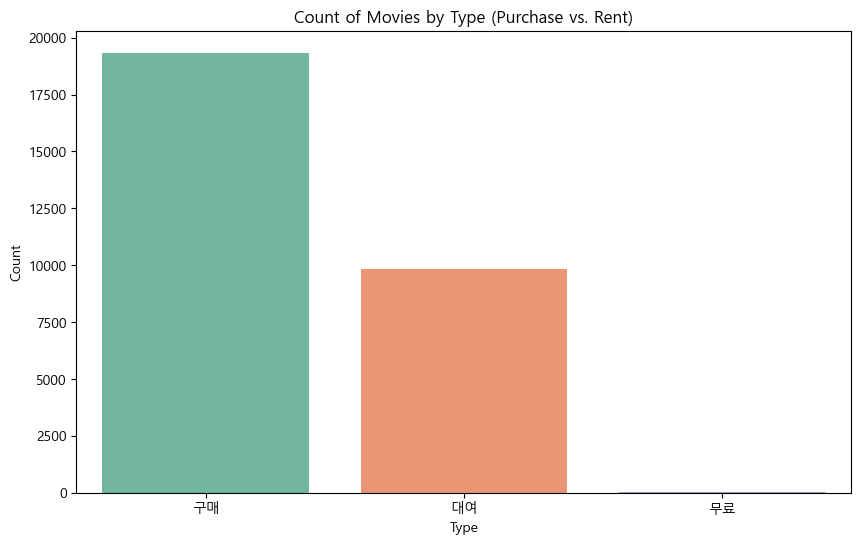

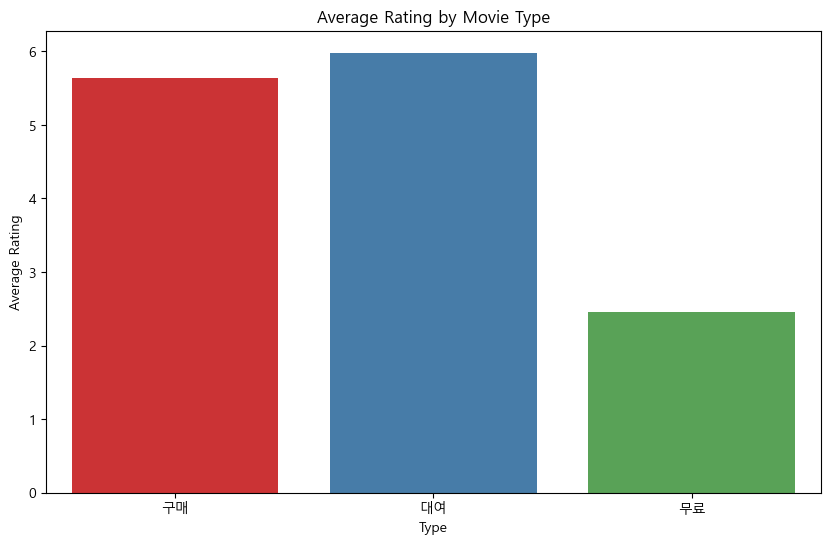

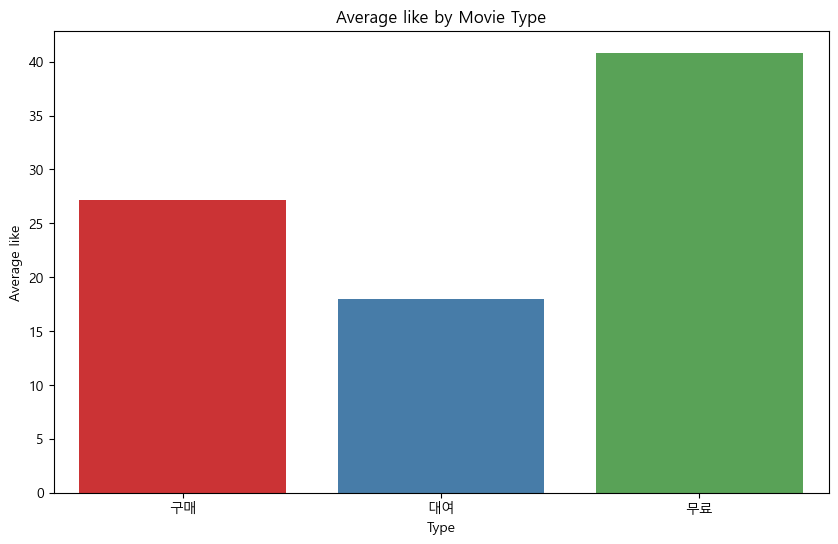

In [10]:
# 구매vs대여vs무료 개수
plt.figure(figsize=(10, 6))
sns.countplot(x='type', data=df, palette='Set2')
plt.title('Count of Movies by Type (Purchase vs. Rent)')
plt.xlabel('Type')
plt.ylabel('Count')
plt.show()

# 구매,대여별 평균 별점
plt.figure(figsize=(10, 6))
avg_rating_by_type = df.groupby('type')['rating'].mean().reset_index()
sns.barplot(x='type', y='rating', data=avg_rating_by_type, palette='Set1')
plt.title('Average Rating by Movie Type')
plt.xlabel('Type')
plt.ylabel('Average Rating')
plt.show()

# 구매,대여별 평균 별점
plt.figure(figsize=(10, 6))
avg_rating_by_type = df.groupby('type')['like'].mean().reset_index()
sns.barplot(x='type', y='like', data=avg_rating_by_type, palette='Set1')
plt.title('Average like by Movie Type')
plt.xlabel('Type')
plt.ylabel('Average like')
plt.show()

# 1. 사람들은 현대의 영화보다 고전 명작을 더 선호할 것이다.
##### EX- 타이타닉은  1997년에 만들어진 영화임에도 아직까지 큰 사랑을 받는다. 이에 아직까지 구전되어오는 명작 영화들은 스테디셀러로서 사람들에게 꾸준히 선호될 것이다.

In [12]:
filtered_df = df[df['year'] != 0]
sorted_data = filtered_df.sort_values(by='year')

index_25 = int(0.25 * len(sorted_data))

sorted_data.iloc[index_25]['year']


2007

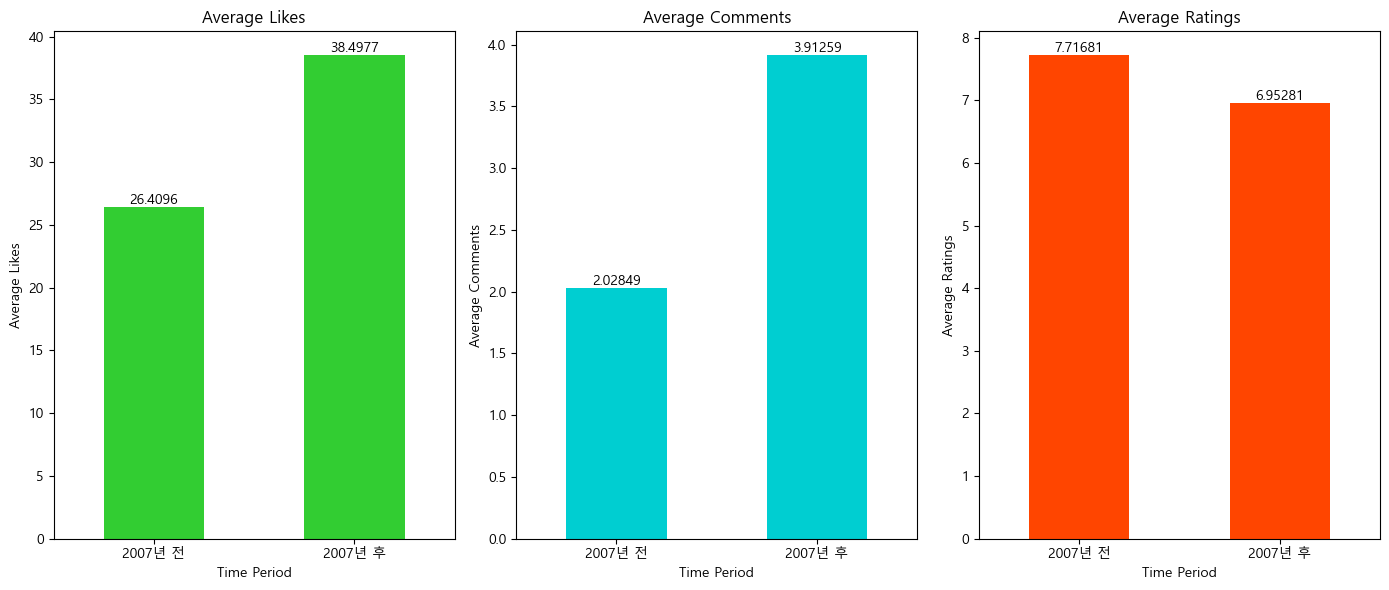

In [13]:


# 2007년 이전과 이후로 데이터를 나누기
df_before_2007 = filtered_df[filtered_df['year'] < 2007]
df_after_2007 = filtered_df[filtered_df['year'] >= 2007]

# 각 그룹의 평균 like, comment, rating 계산
mean_before_2007 = df_before_2007[['like', 'comment', 'rating']].mean()
mean_after_2007 = df_after_2007[['like', 'comment', 'rating']].mean()

# 결과를 하나의 데이터프레임으로 결합
mean_values = pd.DataFrame({
    '2007년 전': mean_before_2007,
    '2007년 후': mean_after_2007
}).transpose()

# 각 평균값을 subplot으로 시각화
fig, axes = plt.subplots(1, 3, figsize=(14, 6))

# like 평균값
plot1 = mean_values[['like']].plot(kind='bar', ax=axes[0], legend=False, color = 'limegreen')
axes[0].set_title('Average Likes')
axes[0].set_xlabel('Time Period')
axes[0].set_ylabel('Average Likes')
axes[0].set_xticklabels(mean_values.index, rotation=0)
axes[0].bar_label(plot1.containers[0])

# comment 평균값
plot2 = mean_values[['comment']].plot(kind='bar', ax=axes[1], legend=False, color = 'darkturquoise')
axes[1].set_title('Average Comments')
axes[1].set_xlabel('Time Period')
axes[1].set_ylabel('Average Comments')
axes[1].set_xticklabels(mean_values.index, rotation=0)
axes[1].bar_label(plot2.containers[0])

# rating 평균값
plot3 = mean_values[['rating']].plot(kind='bar', ax=axes[2], legend=False, color = 'orangered')
axes[2].set_title('Average Ratings')
axes[2].set_xlabel('Time Period')
axes[2].set_ylabel('Average Ratings')
axes[2].set_xticklabels(mean_values.index, rotation=0)
axes[2].bar_label(plot3.containers[0])
plt.tight_layout()
plt.show()

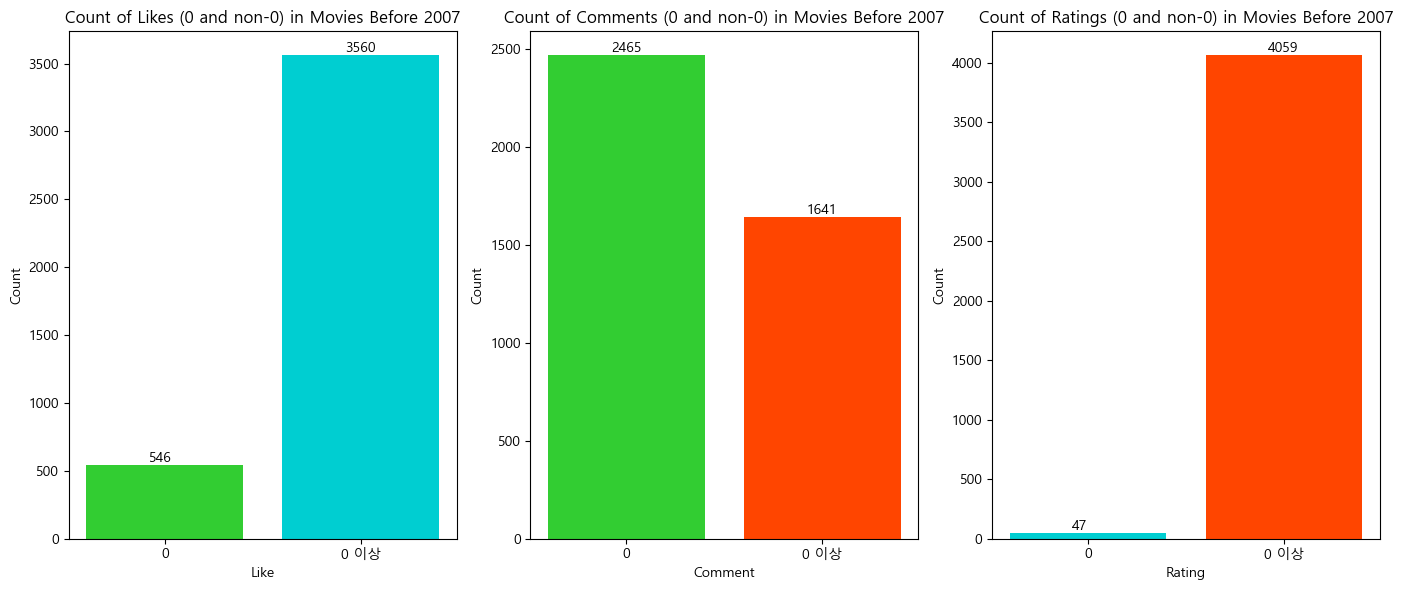

In [14]:
like_0 = df_before_2007[df_before_2007['like'] == 0].shape[0]
like_not0 = df_before_2007[df_before_2007['like'] != 0].shape[0]
comment_0 = df_before_2007[df_before_2007['comment'] == 0].shape[0]
comment_not0 = df_before_2007[df_before_2007['comment'] != 0].shape[0]
rating_0 = df_before_2007[df_before_2007['rating'] == 0].shape[0]
rating_not0 = df_before_2007[df_before_2007['rating'] != 0].shape[0]

fig, axs = plt.subplots(1, 3, figsize=(14, 6))

like_counts = pd.DataFrame({
    'like': ['0', '0 이상'],
    'count': [like_0, like_not0]
})

comment_counts = pd.DataFrame({
    'comment': ['0', '0 이상'],
    'count': [comment_0, comment_not0]
})

rating_counts = pd.DataFrame({
    'rating': ['0', '0 이상'],
    'count': [rating_0, rating_not0]
})


plot1 = axs[0].bar(like_counts['like'], like_counts['count'], color=['limegreen', 'darkturquoise'])
axs[0].set_title('Count of Likes (0 and non-0) in Movies Before 2007')
axs[0].set_xlabel('Like')
axs[0].set_ylabel('Count')

for bar in plot1:
    yval = bar.get_height()
    axs[0].text(bar.get_x() + bar.get_width()/2.5, yval, int(yval), va='bottom')  # va: vertical alignment
    
plot2 = axs[1].bar(comment_counts['comment'], comment_counts['count'], color=['limegreen', 'orangered'])
axs[1].set_title('Count of Comments (0 and non-0) in Movies Before 2007')
axs[1].set_xlabel('Comment')
axs[1].set_ylabel('Count')

for bar in plot2:
    yval = bar.get_height()
    axs[1].text(bar.get_x() + bar.get_width()/2.5, yval, int(yval), va='bottom')  # va: vertical alignment
    
plot3 = axs[2].bar(rating_counts['rating'], rating_counts['count'], color=['darkturquoise', 'orangered'])
axs[2].set_title('Count of Ratings (0 and non-0) in Movies Before 2007')
axs[2].set_xlabel('Rating')
axs[2].set_ylabel('Count')
for bar in plot3:
    yval = bar.get_height()
    axs[2].text(bar.get_x() + bar.get_width()/2.5, yval, int(yval), va='bottom')  # va: vertical alignment

plt.tight_layout()
plt.show()


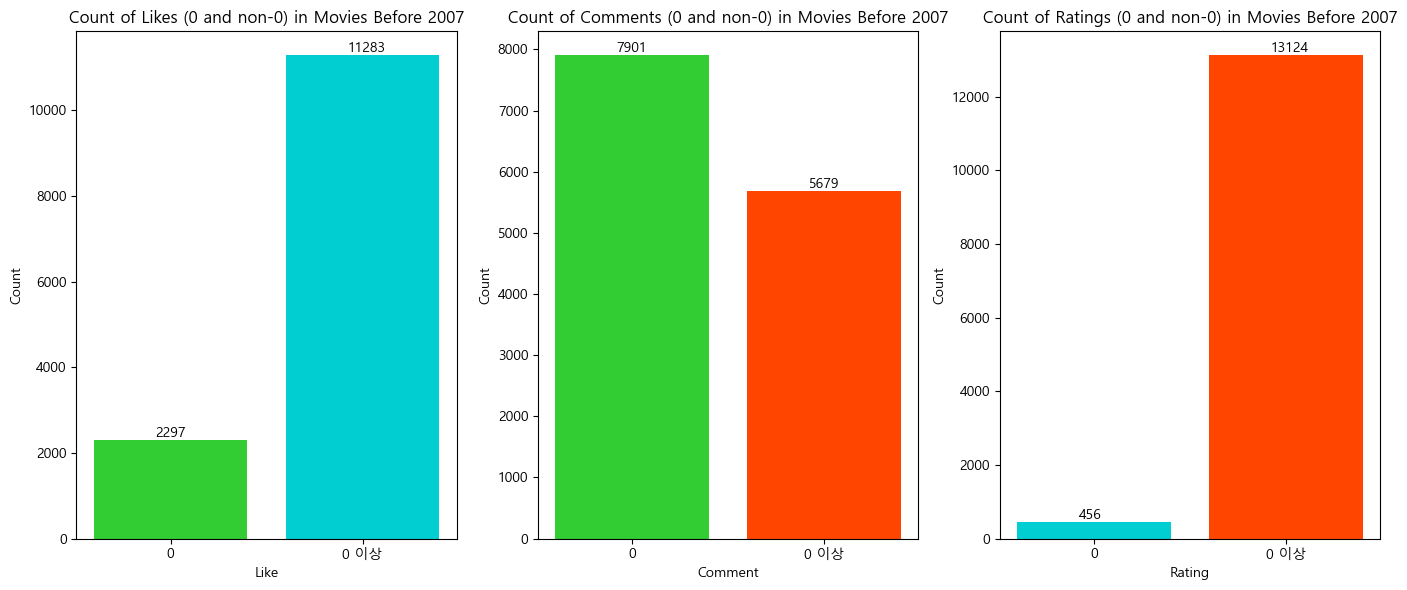

In [15]:
like_0 = df_after_2007[df_after_2007['like'] == 0].shape[0]
like_not0 = df_after_2007[df_after_2007['like'] != 0].shape[0]
comment_0 = df_after_2007[df_after_2007['comment'] == 0].shape[0]
comment_not0 = df_after_2007[df_after_2007['comment'] != 0].shape[0]
rating_0 = df_after_2007[df_after_2007['rating'] == 0].shape[0]
rating_not0 = df_after_2007[df_after_2007['rating'] != 0].shape[0]

fig, axs = plt.subplots(1, 3, figsize=(14, 6))

like_counts = pd.DataFrame({
    'like': ['0', '0 이상'],
    'count': [like_0, like_not0]
})

comment_counts = pd.DataFrame({
    'comment': ['0', '0 이상'],
    'count': [comment_0, comment_not0]
})

rating_counts = pd.DataFrame({
    'rating': ['0', '0 이상'],
    'count': [rating_0, rating_not0]
})


plot1 = axs[0].bar(like_counts['like'], like_counts['count'], color=['limegreen', 'darkturquoise'])
axs[0].set_title('Count of Likes (0 and non-0) in Movies Before 2007')
axs[0].set_xlabel('Like')
axs[0].set_ylabel('Count')

for bar in plot1:
    yval = bar.get_height()
    axs[0].text(bar.get_x() + bar.get_width()/2.5, yval, int(yval), va='bottom')  # va: vertical alignment
    
plot2 = axs[1].bar(comment_counts['comment'], comment_counts['count'], color=['limegreen', 'orangered'])
axs[1].set_title('Count of Comments (0 and non-0) in Movies Before 2007')
axs[1].set_xlabel('Comment')
axs[1].set_ylabel('Count')

for bar in plot2:
    yval = bar.get_height()
    axs[1].text(bar.get_x() + bar.get_width()/2.5, yval, int(yval), va='bottom')  # va: vertical alignment
    
plot3 = axs[2].bar(rating_counts['rating'], rating_counts['count'], color=['darkturquoise', 'orangered'])
axs[2].set_title('Count of Ratings (0 and non-0) in Movies Before 2007')
axs[2].set_xlabel('Rating')
axs[2].set_ylabel('Count')
for bar in plot3:
    yval = bar.get_height()
    axs[2].text(bar.get_x() + bar.get_width()/2.5, yval, int(yval), va='bottom')  # va: vertical alignment

plt.tight_layout()
plt.show()


# 2. 영화 상영 시간이 어느 임계점을 넘어 가버리면 사람들은 오히려 영화에 흥미를 잃어 버릴 것이다.
##### 영화상영시간은 정규분포와 비슷한 형태를 보이는것으로 확인된다. 평균상영시간을 기준으로 탐구해보자

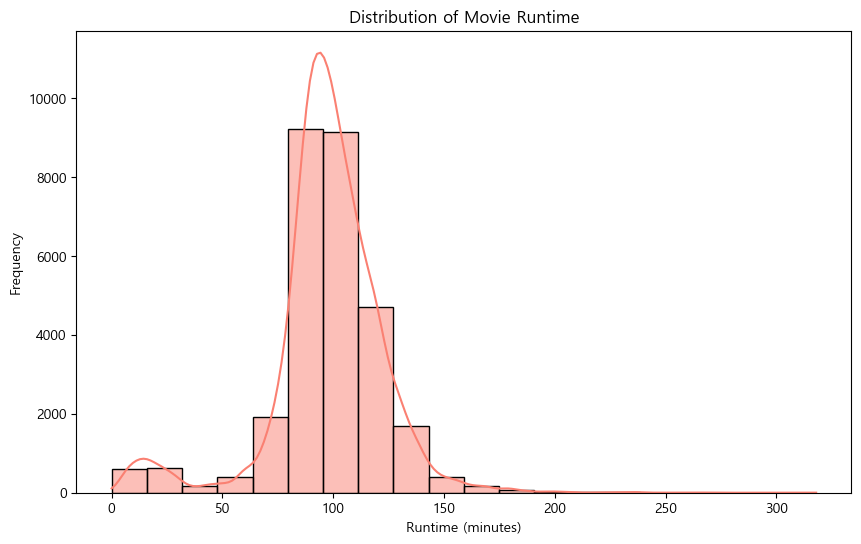

영화 평균 상영시간


97.53565187596368

In [18]:
#상영시간분포
plt.figure(figsize=(10, 6))
sns.histplot(df['runtime'], bins=20, kde=True, color='salmon')
plt.title('Distribution of Movie Runtime')
plt.xlabel('Runtime (minutes)')
plt.ylabel('Frequency')
plt.show()

#상영시간평균
print("영화 평균 상영시간")
df['runtime'].mean()

<Figure size 1000x600 with 0 Axes>

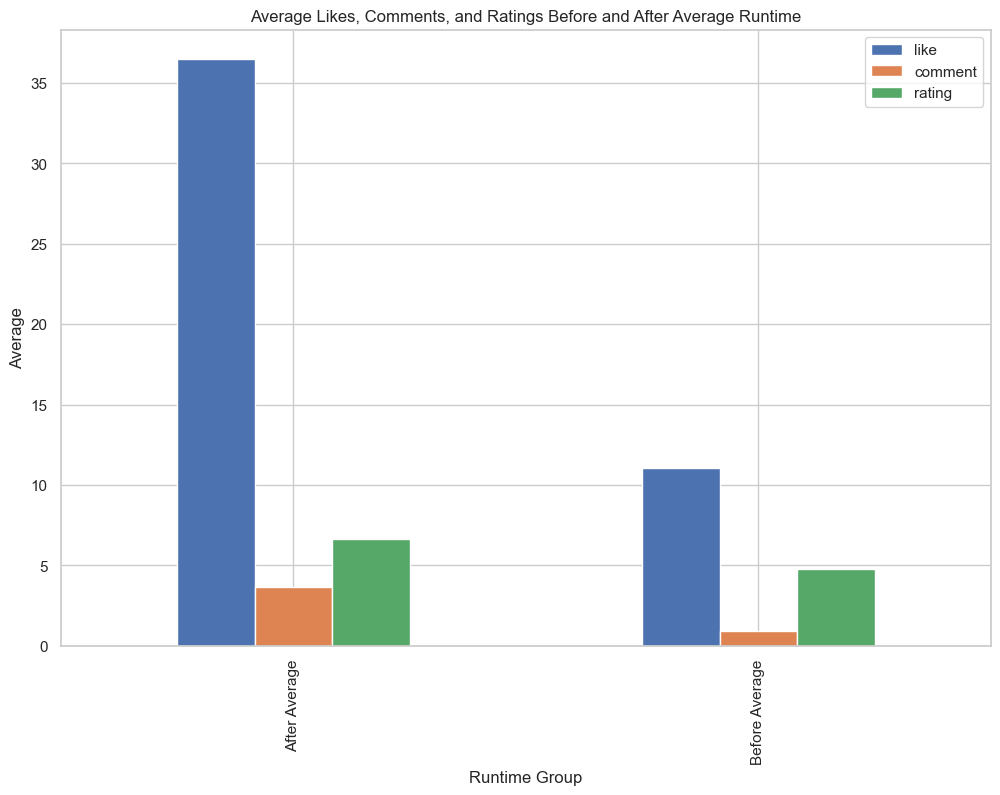

In [22]:
data = df.copy()
average_runtime = df['runtime'].mean()

# Create two groups: before and after the average runtime
df['runtime_group'] = np.where(df['runtime'] <= average_runtime, 'Before Average', 'After Average')

# Calculate the average like, comment, and rating for each group
grouped_runtime_data = df.groupby('runtime_group').agg({
    'like': 'mean',
    'comment': 'mean',
    'rating': 'mean'
}).reset_index()

# Plot a barplot showing the average like, comment, and rating of the group before and after the average
plt.figure(figsize=(10, 6))
grouped_runtime_data.plot(kind='bar', x='runtime_group', figsize=(12, 8))
plt.xlabel('Runtime Group')
plt.ylabel('Average')
plt.title('Average Likes, Comments, and Ratings Before and After Average Runtime')
plt.legend(loc='upper right')
plt.show()

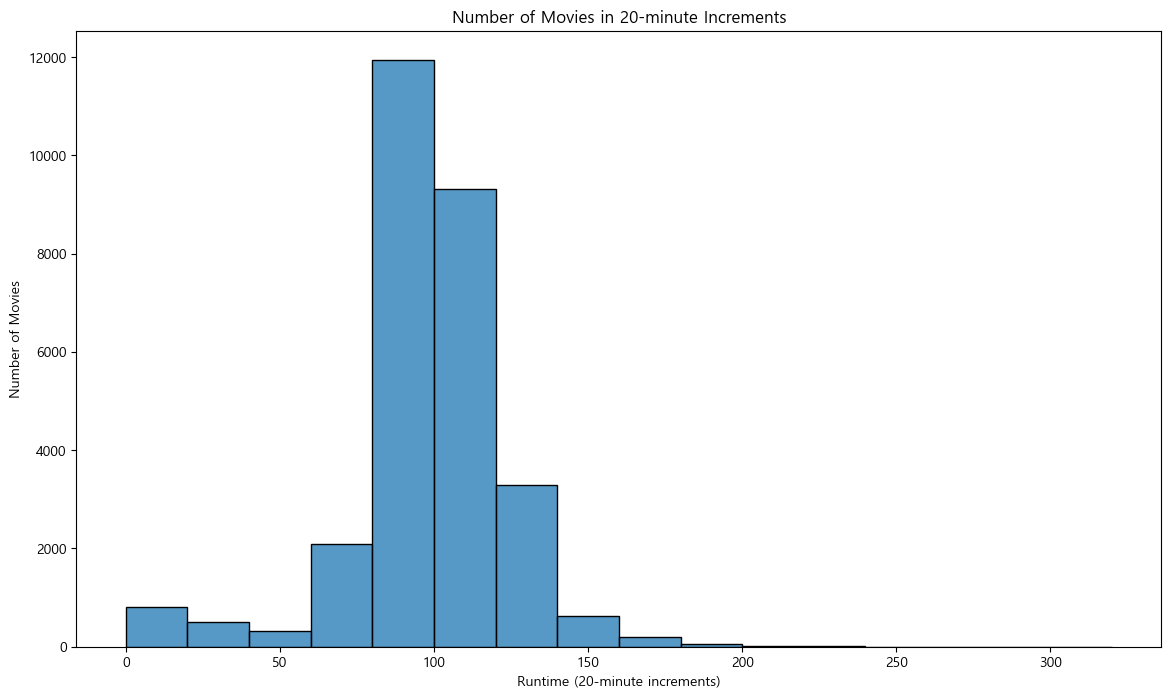

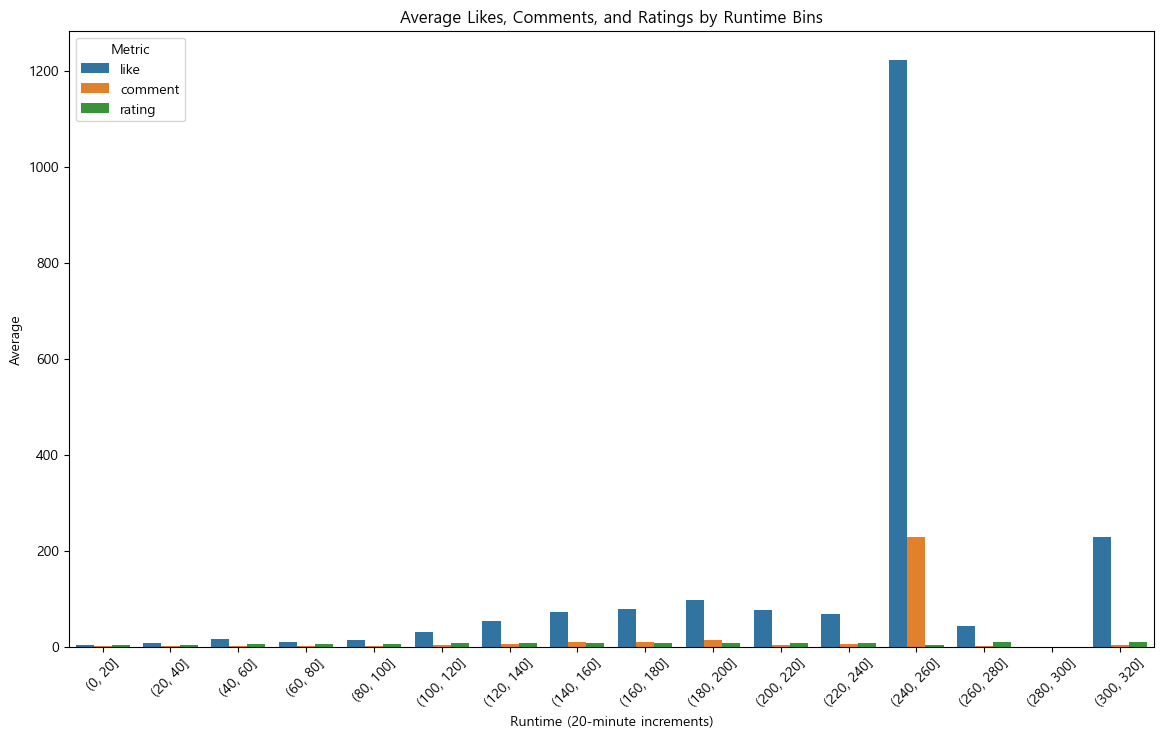

In [28]:
# Create a histogram plot to count the number of movies in 20-minute increments
plt.figure(figsize=(14, 8))
sns.histplot(df['runtime'], bins=np.arange(0, df['runtime'].max() + 20, 20))
plt.xlabel('Runtime (20-minute increments)')
plt.ylabel('Number of Movies')
plt.title('Number of Movies in 20-minute Increments')
plt.show()

# Calculate the average of likes, comments, and ratings for each 20-minute increment
df['runtime_bin'] = pd.cut(df['runtime'], bins=np.arange(0, df['runtime'].max() + 20, 20))
grouped_data = df.groupby('runtime_bin').agg({
    'like': 'mean',
    'comment': 'mean',
    'rating': 'mean'
}).reset_index()

# Create a new dataframe to prepare for the histplot
grouped_data_melted = grouped_data.melt(id_vars='runtime_bin', value_vars=['like', 'comment', 'rating'], var_name='metric', value_name='average')

# Plotting the averages using a barplot as histplot is not appropriate for this data
plt.figure(figsize=(14, 8))
sns.barplot(data=grouped_data_melted, x='runtime_bin', y='average', hue='metric')
plt.xlabel('Runtime (20-minute increments)')
plt.ylabel('Average')
plt.legend(title='Metric')
plt.title('Average Likes, Comments, and Ratings by Runtime Bins')
plt.xticks(rotation=45)
plt.show()


In [33]:
df[(df['runtime'] >= 240) & (df['runtime'] <= 260)][df.columns[:14]]


,title,year,version,type,director,actor,age,runtime,rating,like,comment,isDRM,cost,period
22066,잭 스나이더의 저스티스 리그(부가영상 제공),0,Null,구매,잭 스나이더,"벤 애플렉,헨리 카빌,갤 가돗,제이슨 모모아,에즈라 밀러,레이 피셔,자레드 레토,엠...",12세 관람가,242,0.00,2422,455,DRM,4950,5년
25031,클레오파트라,1967,Null,구매,조셉 L. 맨키위즈,"엘리자베스 테일러,리처드 버튼,로디 맥도웰,렉스 해리슨,파멜라 브라운,조지 콜,험 ...",15세 관람가,251,8.36,23,0,DRM,5500,5년


# 너의이름은같은 애들의 좋아요가 이상치 수준으로 높은 것들 확인. 상위 1%인 애들은 제거하고 다시 플롯을 그려보자.

## rating의 경우 상영시간이 길수록 상승곡선을 타는 경향이 있음. 

## 댓글 수의 경우엔 평균쪽에서 주로 형성되며, like는 상위1%를 제거했을때도 상위구간에 이상치로 보이는 현상이 확인됨. 

##### 95%로 확인했을때에는 280분 이상의 영화가 멸종하며, 이경우엔 comment와 비슷한 분포를 보이게 됨.
###### 이것은 like와 comment가 높은 상관관계를 보였을때 추측가능한 결과였음

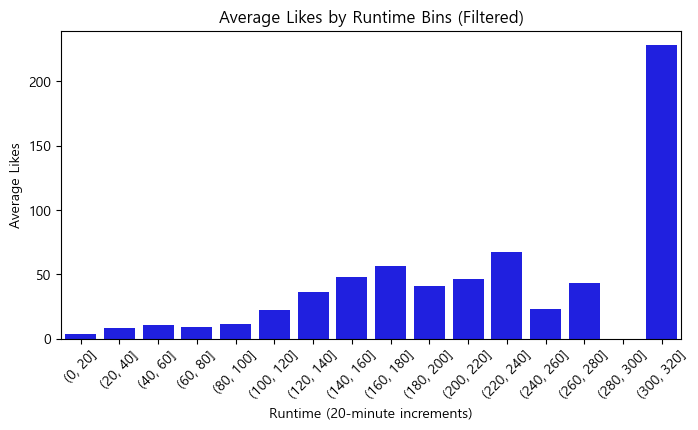

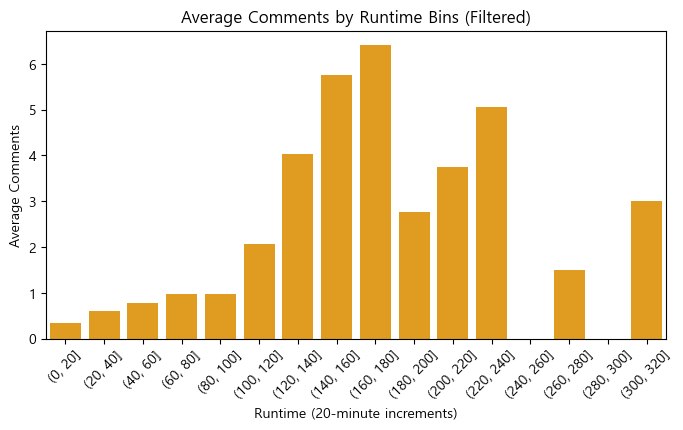

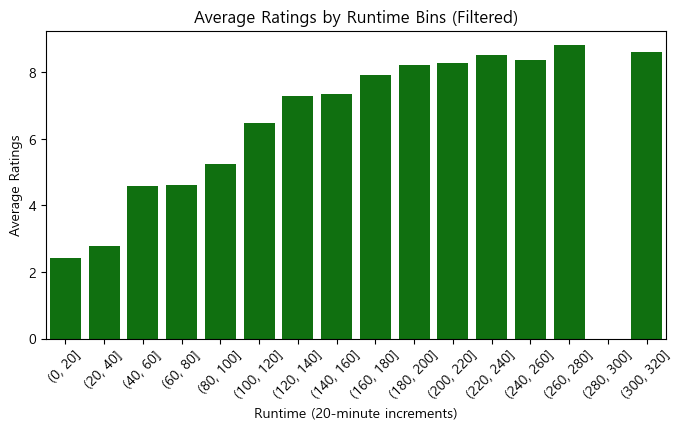

In [35]:
quantile_99 = df['like'].quantile(0.99)
filtered_df = df[df['like'] < quantile_99]

# 각 20분 간격에 대한 평균 좋아요 수, 댓글 수, 평점을 계산 (이상치 제거 후)
grouped_data_filtered = filtered_df.groupby('runtime_bin').agg({
    'like': 'mean',
    'comment': 'mean',
    'rating': 'mean'
}).reset_index()

# Like에 대한 바 플롯 생성
plt.figure(figsize=(8, 4))
sns.barplot(data=grouped_data_filtered, x='runtime_bin', y='like', color='blue')
plt.xlabel('Runtime (20-minute increments)')
plt.ylabel('Average Likes')
plt.title('Average Likes by Runtime Bins (Filtered)')
plt.xticks(rotation=45)
plt.show()

# Comment에 대한 바 플롯 생성
plt.figure(figsize=(8, 4))
sns.barplot(data=grouped_data_filtered, x='runtime_bin', y='comment', color='orange')
plt.xlabel('Runtime (20-minute increments)')
plt.ylabel('Average Comments')
plt.title('Average Comments by Runtime Bins (Filtered)')
plt.xticks(rotation=45)
plt.show()

# Rating에 대한 바 플롯 생성
plt.figure(figsize=(8, 4))
sns.barplot(data=grouped_data_filtered, x='runtime_bin', y='rating', color='green')
plt.xlabel('Runtime (20-minute increments)')
plt.ylabel('Average Ratings')
plt.title('Average Ratings by Runtime Bins (Filtered)')
plt.xticks(rotation=45)
plt.show()


# 3. 좋아요 수가 상위 n%인 영화와 나머지 영화간의 차이
##### 장르와 상영시간, 구매영화끼리 평균가격, 대여영화끼리 평균가격을 비교해보자.

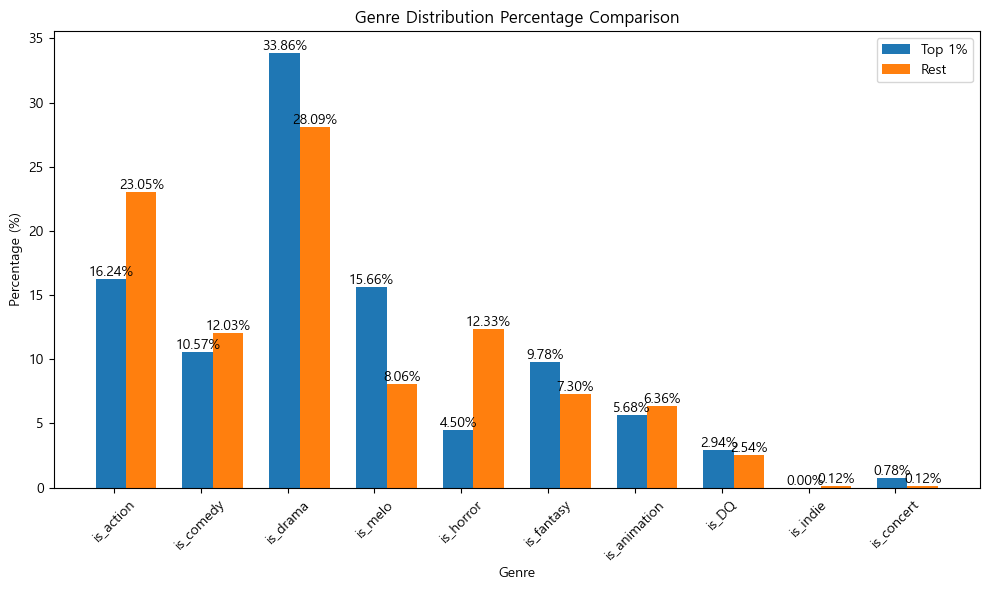

In [41]:
# Calculate the threshold for the top 1% 'like' count
like_th = df['like'].quantile(0.99)

# Split the dataframe into top 1% and the rest
top_1df = df[df['like'] >= like_th]
rest_df = df[df['like'] < like_th]

# Calculate genre distribution for top 1% movies
genre_columns = ['is_action', 'is_comedy', 'is_drama', 'is_melo', 'is_horror', 'is_fantasy', 'is_animation', 'is_DQ', 'is_indie', 'is_concert']
top_1genre = top_1df[genre_columns].sum()

# Calculate genre distribution for the rest of the movies
rest_genre = rest_df[genre_columns].sum()
# Calculate the percentage distribution for each genre
top_1_percentage = (top_1genre / top_1genre.sum()) * 100
rest_percentage = (rest_genre / rest_genre.sum()) * 100

# Combine the percentage distributions into a single dataframe
genre_distribution_percentage_df = pd.DataFrame({
    'Top 1%': top_1_percentage,
    'Rest': rest_percentage
}).reset_index().rename(columns={'index': 'Genre'})

# Plotting the percentage genre distributions
fig, ax = plt.subplots(figsize=(10, 6))

bar_width = 0.35
index = genre_distribution_percentage_df.index

bars1 = ax.bar(index, genre_distribution_percentage_df['Top 1%'], bar_width, label='Top 1%')
bars2 = ax.bar(index + bar_width, genre_distribution_percentage_df['Rest'], bar_width, label='Rest')

ax.set_xlabel('Genre')
ax.set_ylabel('Percentage (%)')
ax.set_title('Genre Distribution Percentage Comparison')
ax.set_xticks(index + bar_width / 10)
ax.set_xticklabels(genre_distribution_percentage_df['Genre'], rotation=45)
ax.legend()

# Adding value labels on top of the bars
for bar in bars1:
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, yval, f'{yval:.2f}%', va='bottom', ha = 'center') 

for bar in bars2:
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, yval, f'{yval:.2f}%', va='bottom', ha = 'center') 

plt.tight_layout()
plt.show()



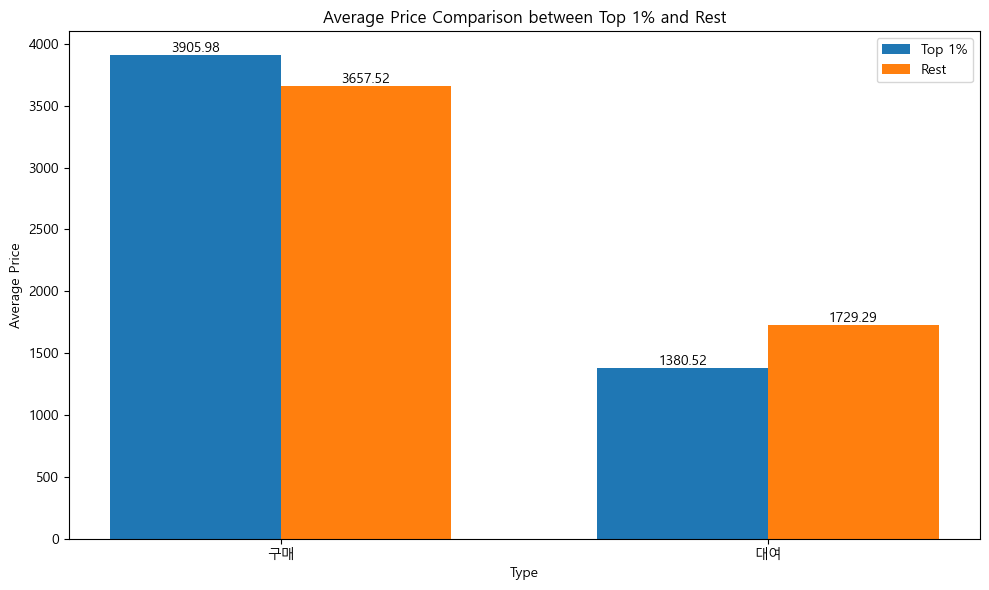

In [39]:
# Convert cost columns to numerical values for analysis
df['cost'] = pd.to_numeric(df['cost'], errors='coerce')

# Filter the data for purchase and rental movies
purchase_movies = df[df['type'] == '구매']
rental_movies = df[df['type'] == '대여']

# Calculate average prices for top 1% and rest for purchase and rental movies
purchase_top_1_percent_avg_price = purchase_movies[purchase_movies['like'] >= like_th]['cost'].mean()
purchase_rest_avg_price = purchase_movies[purchase_movies['like'] < like_th]['cost'].mean()
rental_top_1_percent_avg_price = rental_movies[rental_movies['like'] >= like_th]['cost'].mean()
rental_rest_avg_price = rental_movies[rental_movies['like'] < like_th]['cost'].mean()

# Create a dataframe for the average prices
avg_price_df = pd.DataFrame({
    'Type': ['구매', '대여'],
    'Top 1%': [purchase_top_1_percent_avg_price, rental_top_1_percent_avg_price],
    'Rest': [purchase_rest_avg_price, rental_rest_avg_price]
})

# Plotting the average prices
fig, ax = plt.subplots(figsize=(10, 6))

bar_width = 0.35
index = avg_price_df.index

bars1 = ax.bar(index, avg_price_df['Top 1%'], bar_width, label='Top 1%')
bars2 = ax.bar(index + bar_width, avg_price_df['Rest'], bar_width, label='Rest')

ax.set_xlabel('Type')
ax.set_ylabel('Average Price')
ax.set_title('Average Price Comparison between Top 1% and Rest')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(avg_price_df['Type'])
ax.legend()

# Adding value labels on top of the bars
for bar in bars1:
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2.0, yval, f'{yval:.2f}', ha='center', va='bottom')

for bar in bars2:
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2.0, yval, f'{yval:.2f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()



In [43]:
# Calculate the composition ratio for purchase and rental movies within each group (Top 1% and Rest)
purchase_count_top_1_percent = len(purchase_movies[purchase_movies['like'] >= like_th])
rental_count_top_1_percent = len(rental_movies[rental_movies['like'] >= like_th])

purchase_count_rest = len(purchase_movies[purchase_movies['like'] < like_th])
rental_count_rest = len(rental_movies[rental_movies['like'] < like_th])

# Total counts for each group
total_top_1_percent = purchase_count_top_1_percent + rental_count_top_1_percent
total_rest = purchase_count_rest + rental_count_rest

# Calculate composition ratios
purchase_ratio_top_1_percent = (purchase_count_top_1_percent / total_top_1_percent) * 100
rental_ratio_top_1_percent = (rental_count_top_1_percent / total_top_1_percent) * 100

purchase_ratio_rest = (purchase_count_rest / total_rest) * 100
rental_ratio_rest = (rental_count_rest / total_rest) * 100

# Create a dataframe for the composition ratios
composition_ratio_df = pd.DataFrame({
    'Type': ['구매', '대여'],
    'Top 1%': [purchase_ratio_top_1_percent, rental_ratio_top_1_percent],
    'Rest': [purchase_ratio_rest, rental_ratio_rest]
})

composition_ratio_df 
#top1%에서 구매가 훨씬 많이 구성되어있음

,Type,Top 1%,Rest
0,구매,80.136986,66.205869
1,대여,19.863014,33.794131


# 4. 같은 영화에 대해서 대여/구매가 동시에 존재할 때, 사람들은 주로 대여로 이용할 것이다.
##### 구매와 대여중에 어떤 기능에 사람들이 더 관심을 보였는지(좋아요와 댓글수가 차이가 존재하는지) 비교하기

In [44]:
#df[(df['type'])]
grouped_df = df.groupby(['title', 'year', 'runtime']).filter(lambda x: set(x['type']) == {'구매', '대여'})

grouped_df



,title,year,version,type,director,actor,age,runtime,rating,like,...,is_comedy,is_drama,is_melo,is_horror,is_fantasy,is_animation,is_DQ,is_indie,is_concert,runtime_bin
2,...ing,2003,Null,구매,이언희,"임수정,김래원,이미숙,최덕문,이성경,김지영,윤덕현,이유정",12세 관람가,103,8.89,9,...,0,0,1,0,0,0,0,0,0,"(100, 120]"
3,...ing,2003,Null,대여,이언희,"임수정,김래원,이미숙,최덕문,이성경,김지영,윤덕현,이유정",12세 관람가,103,8.89,4,...,0,0,1,0,0,0,0,0,0,"(100, 120]"
9,00K9: 노 타임 투 다이,0,Null,구매,버드 배니스터,Null,전체 관람가,70,0.00,0,...,0,0,0,0,0,1,0,0,0,"(60, 80]"
10,00K9: 노 타임 투 다이,0,Null,대여,버드 배니스터,Null,전체 관람가,70,0.00,3,...,0,0,0,0,0,1,0,0,0,"(60, 80]"
13,1 더하기 3,2019,Null,구매,프룻 챈,"증미혜자,진담문,등월평",19세 관람가,100,6.87,4,...,0,0,1,0,0,0,0,0,0,"(80, 100]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29175,힌터랜드,0,Null,대여,슈테판 루조비츠키,"무라탄 무슬루,리브 리사 프라이스,마크 림파흐,맥스 본 더 그로벤",15세 관람가,99,0.00,0,...,0,0,0,0,0,0,0,0,0,"(80, 100]"
29180,힙노시스: LP 커버의 전설,2024,Null,구매,안톤 코르빈,"오브리 포웰,스톰 소거슨,폴 맥카트니,데이빗 길모어,로저 워터스,닉 메이슨,지미 페...",15세 관람가,101,8.26,0,...,0,0,0,0,0,0,1,0,0,"(100, 120]"
29181,힙노시스: LP 커버의 전설,2024,Null,대여,안톤 코르빈,"오브리 포웰,스톰 소거슨,폴 맥카트니,데이빗 길모어,로저 워터스,닉 메이슨,지미 페...",15세 관람가,101,8.26,2,...,0,0,0,0,0,0,1,0,0,"(100, 120]"
29182,힙노틱,2023,Null,구매,로버트 로드리게즈,"벤 애플렉,앨리스 브라가,윌리암 피츠너",15세 관람가,93,6.66,3,...,0,0,0,0,1,0,0,0,0,"(80, 100]"


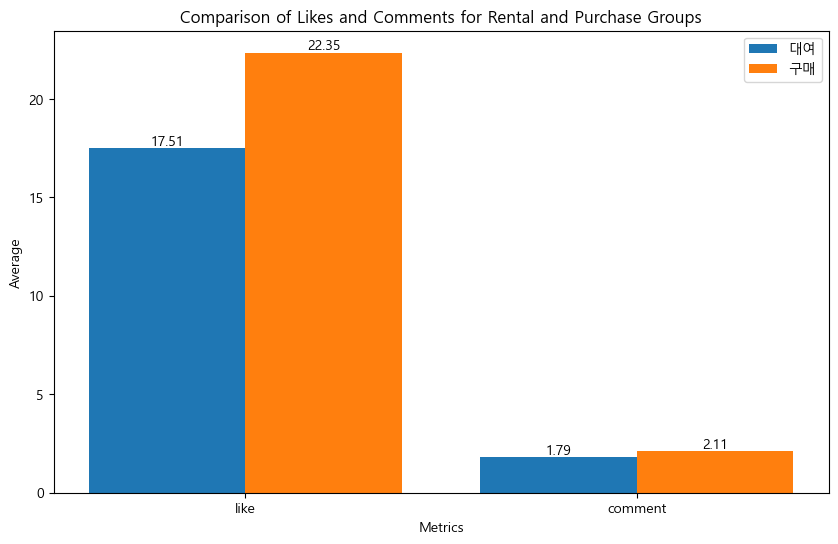

In [51]:

# Separate the filtered data into rental and purchase groups
rental_group = grouped_df[grouped_df['type'] == '대여']
purchase_group = grouped_df[grouped_df['type'] == '구매']

# Calculate the average like and comment for each group
rental_avg = rental_group[['like', 'comment']].mean()
purchase_avg = purchase_group[['like', 'comment']].mean()

fig, ax = plt.subplots(figsize=(10, 6))

index = range(len(rental_avg))

bar_width = 0.4
bar1 = ax.bar(index, rental_avg, bar_width, label='대여')
bar2 = ax.bar([i + bar_width for i in index], purchase_avg, bar_width, label='구매')

ax.set_xlabel('Metrics')
ax.set_ylabel('Average')
ax.set_title('Comparison of Likes and Comments for Rental and Purchase Groups')
ax.set_xticks([i + bar_width / 2 for i in index])
ax.set_xticklabels(['like', 'comment'])


for bar in bar1:
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2, yval, round(yval, 2), ha='center', va='bottom')

for bar in bar2:
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2, yval, round(yval, 2), ha='center', va='bottom')

    
ax.legend()

plt.show()




In [48]:
rental_avg

like       17.508144
comment     1.790037
dtype: float64

# 5. 좋아요를 하나도 받지 못한 영화 안에서 장르의 쏠림이 있을 것이다. (ex- 다큐멘터리를 사람들이 많이 보지 않았을 것이다)




In [35]:
like_0_df = df[df['like']==0]
like_0_df[df.columns[:14]]

,title,year,version,type,director,actor,age,runtime,rating,like,comment,isDRM,cost,period
0,'개그' 더 크라운,2021,Null,구매,아담 크라우스,"로렌 애슐리 카터,트레이시 페레즈",15세 관람가,89,6.33,0,0,DRM,2500,제한 없음
9,00K9: 노 타임 투 다이,0,Null,구매,버드 배니스터,Null,전체 관람가,70,0.00,0,0,DRM,5500,제한 없음
11,03:34 대지진,0,Null,구매,주앙 파블로 터니셔,"마르셀로 알론소,안드레아 프런드,페르난도 고메즈 로비라,로레토 아라베나",15세 관람가,100,5.75,0,0,DRM,1000,제한 없음
16,10 미니츠 곤,2019,Null,대여,브라이언 A 밀러,"브루스 윌리스,마이클 치클리스",15세 관람가,95,3.58,0,0,DRM,1500,7일
18,10 바이 10,0,Null,대여,수지 유잉,"루크 에반스,켈리 라일리,노엘 클락,올리비아 체너리,질 윈터니츠",15세 관람가,86,4.08,0,0,DRM,1400,7일
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29164,히트맨: 에이전트 19,0,Null,구매,할리 웰렌,"톰 시즈모어,데니스 하스킨스,조엘 폴 레이시그,할리 웰렌",19세 관람가,116,0.00,0,0,DRM,5500,제한 없음
29165,히트맨: 에이전트 19,0,Null,대여,할리 웰렌,"톰 시즈모어,데니스 하스킨스,조엘 폴 레이시그,할리 웰렌",19세 관람가,116,0.00,0,0,DRM,1500,7일
29171,히트스트로크,0,Null,구매,에버린 퍼셀,"스티븐 도프,워릭 그리어,캘빈 헤이워드,스베트라나 멧키나,피터 스토메어,메이지 윌리암스",15세 관람가,91,5.76,0,0,DRM,6500,제한 없음
29175,힌터랜드,0,Null,대여,슈테판 루조비츠키,"무라탄 무슬루,리브 리사 프라이스,마크 림파흐,맥스 본 더 그로벤",15세 관람가,99,0.00,0,0,DRM,1000,7일


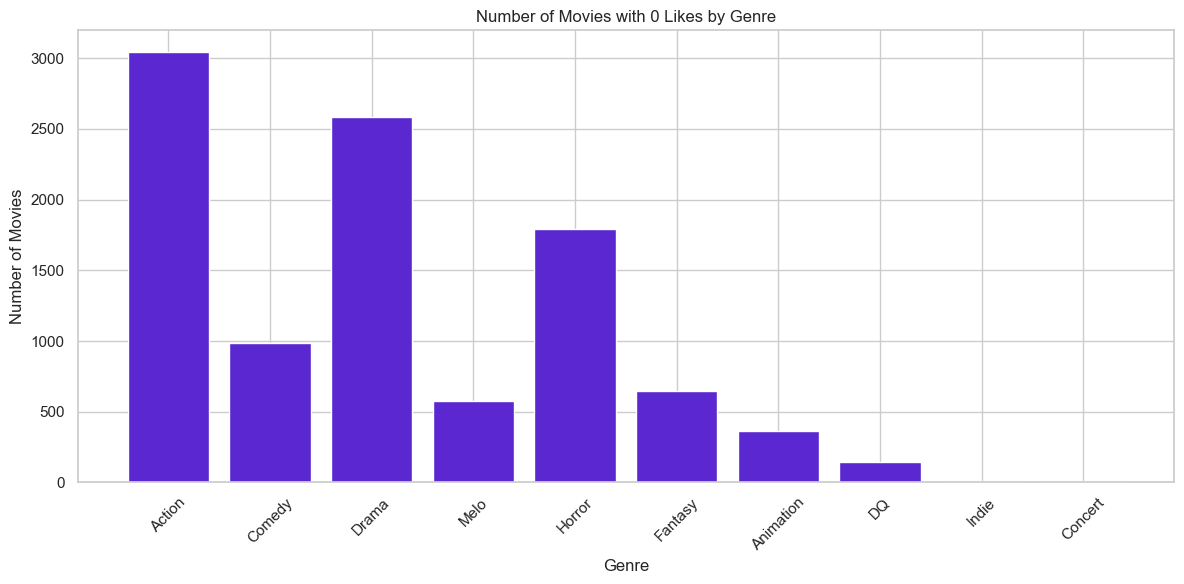

In [31]:


# Create a dictionary to count the number of zero-like movies in each genre
genre_counts = {
    'Action': like_0_df['is_action'].sum(),
    'Comedy': like_0_df['is_comedy'].sum(),
    'Drama': like_0_df['is_drama'].sum(),
    'Melo': like_0_df['is_melo'].sum(),
    'Horror': like_0_df['is_horror'].sum(),
    'Fantasy': like_0_df['is_fantasy'].sum(),
    'Animation': like_0_df['is_animation'].sum(),
    'DQ': like_0_df['is_DQ'].sum(),
    'Indie': like_0_df['is_indie'].sum(),
    'Concert': like_0_df['is_concert'].sum(),
}

# Convert the dictionary to a pandas DataFrame for plotting
genre_counts_df = pd.DataFrame(list(genre_counts.items()), columns=['Genre', 'Count'])

# Plot the data
plt.figure(figsize=(12, 6))
plt.bar(genre_counts_df['Genre'], genre_counts_df['Count'], color='#5a27d0')
plt.xlabel('Genre')
plt.ylabel('Number of Movies')
plt.title('Number of Movies with 0 Likes by Genre')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


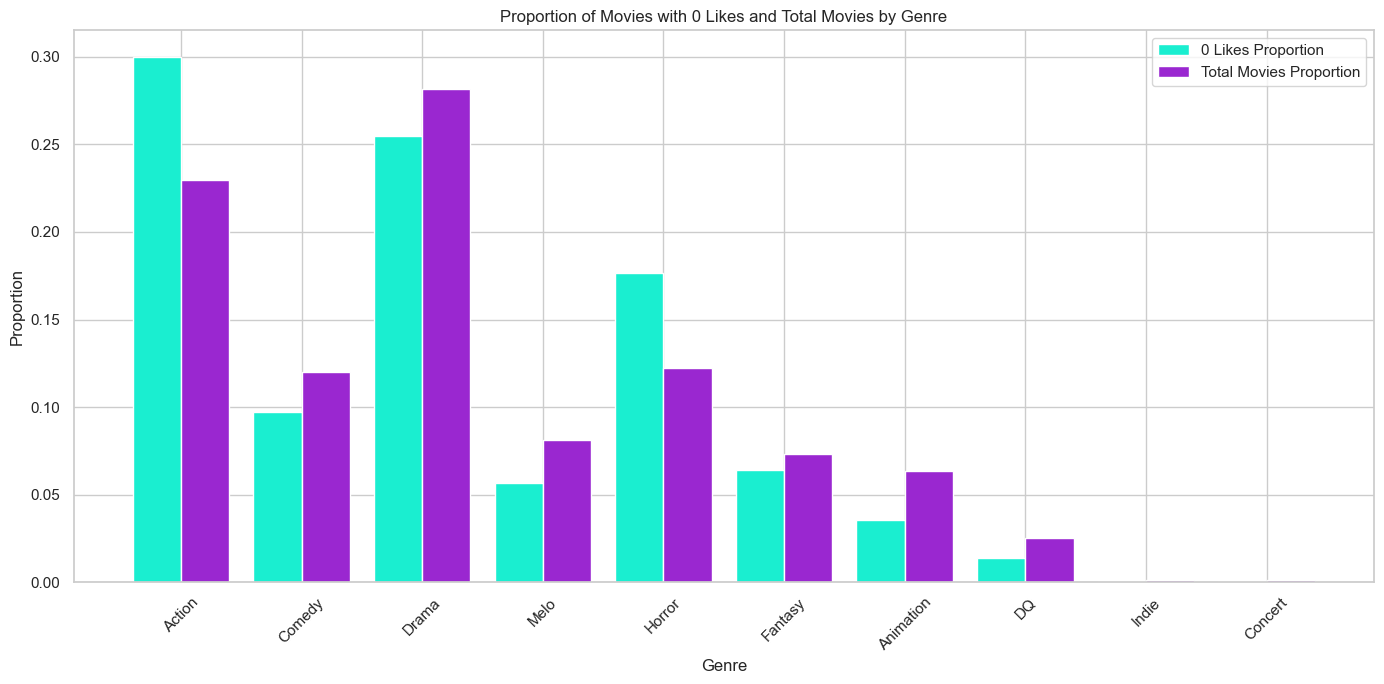

In [32]:
total_genre_counts = {
    'Action': data['is_action'].sum(),
    'Comedy': data['is_comedy'].sum(),
    'Drama': data['is_drama'].sum(),
    'Melo': data['is_melo'].sum(),
    'Horror': data['is_horror'].sum(),
    'Fantasy': data['is_fantasy'].sum(),
    'Animation': data['is_animation'].sum(),
    'DQ': data['is_DQ'].sum(),
    'Indie': data['is_indie'].sum(),
    'Concert': data['is_concert'].sum(),
}

# Convert the dictionary to a pandas DataFrame
total_genre_counts_df = pd.DataFrame(list(total_genre_counts.items()), columns=['Genre', 'Total Count'])

# Merge the two DataFrames on 'Genre'
comparison_df = pd.merge(genre_counts_df, total_genre_counts_df, on='Genre')

# Calculate the proportion of 0-like movies and total movies for each genre
comparison_df['Zero Likes Proportion'] = comparison_df['Count'] / comparison_df['Count'].sum()
comparison_df['Total Movies Proportion'] = comparison_df['Total Count'] / comparison_df['Total Count'].sum()

# Plot the data as proportions
plt.figure(figsize=(14, 7))
width = 0.4
x = range(len(comparison_df))

plt.bar([i - width/2 for i in x], comparison_df['Zero Likes Proportion'], width=width, label='0 Likes Proportion', color='#1aeed0')
plt.bar([i + width/2 for i in x], comparison_df['Total Movies Proportion'], width=width, label='Total Movies Proportion', color='#9a27d0')

plt.xlabel('Genre')
plt.ylabel('Proportion')
plt.title('Proportion of Movies with 0 Likes and Total Movies by Genre')
plt.xticks(ticks=x, labels=comparison_df['Genre'], rotation=45)
plt.legend()
plt.tight_layout()
plt.show()



In [33]:
print(df[df['type']=='대여']['cost'].mean())
print(df[df['type']=='구매']['cost'].mean())

1727.2258459029758
3660.522152716745


In [45]:
df[df['type']=='대여'].groupby('period').count()


,title,year,version,type,director,actor,age,runtime,rating,like,...,is_drama,is_melo,is_horror,is_fantasy,is_animation,is_DQ,is_indie,is_concert,runtime_group,runtime_bin
period,,,,,,,,,,,,,,,,,,,,,
2일,2608,2608,2608,2608,2608,2608,2608,2608,2608,2608,...,2608,2608,2608,2608,2608,2608,2608,2608,2608,2608
7일,7204,7204,7204,7204,7204,7204,7204,7204,7204,7204,...,7204,7204,7204,7204,7204,7204,7204,7204,7204,7196
